In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

In [4]:
data_train_1 = pd.read_csv("data set\spliting data\\train part_1.csv")
data_train_2 = pd.read_csv("data set\\spliting data\\train part_2.csv")
data_train_3 = pd.read_csv("data set\\spliting data\\train part_3.csv")
data_train_4 = pd.read_csv("data set\\spliting data\\train part_4.csv")
data_train_5 = pd.read_csv("data set\\spliting data\\train part_5.csv")





data_train=pd.concat([data_train_1, data_train_2,data_train_3,data_train_4,data_train_5], axis=0)






data_test= pd.read_csv("data set\\spliting data\\all_test.csv")
data_val= pd.read_csv("data set\\spliting data\\all_val.csv")
data_train = data_train.sample(frac=1).reset_index(drop=True)

data_test = data_test.sample(frac=1).reset_index(drop=True)
data_val = data_val.sample(frac=1).reset_index(drop=True)


In [3]:
# label_encoder = LabelEncoder()
# data_train['label'] = label_encoder.fit_transform(data_train['label'])
# data_test['label']=label_encoder.transform(data_test['label'])
# data_val['label']=label_encoder.transform(data_val['label'])





In [5]:
data_train

,label,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,fake,-283.311554,31.187046,-28.946970,-11.556499,-32.555882,-41.855141,-19.782896,-9.321224,-19.712309,...,13.059452,9.987470,5.166386,-0.173476,-6.596773,-10.595148,-13.903102,-15.579420,-14.352019,-11.065952
1,fake,-324.566284,49.402870,-9.030226,-17.049635,-28.296989,-32.741707,-33.529774,-5.121996,-7.761037,...,13.998918,10.829945,6.067208,0.136120,-5.861391,-10.046918,-13.829299,-14.862589,-13.801239,-10.738633
2,fake,-392.014313,33.131371,-4.878796,-13.363997,-17.182875,-10.407126,-17.547001,-3.700581,-11.286201,...,-4.344838,-7.057742,-11.039385,-12.919526,-13.206600,-10.400198,-6.087649,0.232439,4.813144,8.934919
3,fake,-334.762390,18.874798,-14.712076,-11.442850,-26.685390,-39.362499,-26.962606,-3.733851,-7.861130,...,12.646919,9.761360,4.823850,-0.700359,-6.484222,-10.310863,-13.551920,-14.076427,-12.988032,-10.052153
4,fake,-324.729279,32.109013,-11.770472,-21.599358,-47.190594,-25.715588,-8.714885,-9.079679,-11.118193,...,13.033704,10.121622,6.117833,0.477278,-5.157833,-8.779902,-12.415439,-13.833098,-13.123424,-10.214333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117888,real,-332.626312,46.388092,-19.564096,-18.526155,-30.118418,-33.016506,-15.076029,-14.969038,-14.505702,...,10.849494,8.581655,4.277124,-0.499542,-5.598687,-9.324512,-11.992921,-13.149810,-12.076833,-9.370317
117889,fake,-308.318207,45.479424,-28.539740,-19.566050,-30.487284,-40.426224,-29.042665,-9.204437,-17.208700,...,14.735444,11.107695,5.773496,-0.527312,-6.982715,-11.407546,-15.127619,-16.081844,-14.912663,-11.269162
117890,fake,-296.917328,31.706957,-20.685938,-14.173065,-37.738697,-33.327801,-24.690777,-12.359257,-18.105825,...,12.920901,9.652641,4.938157,-0.794010,-6.800850,-10.618022,-14.024055,-15.051871,-13.718632,-10.240227
117891,fake,-326.207153,25.595623,-6.652762,-2.141933,-33.583630,-36.220303,-23.050676,-16.032793,-13.025049,...,14.144604,11.042810,6.323411,0.552983,-5.906901,-10.563864,-14.320948,-15.713376,-14.421327,-11.000566


In [6]:
count = data_train['label'].value_counts()
print(count)


fake    107413
real     10480
Name: label, dtype: int64


In [7]:
# Assuming 'data' is your DataFrame
X_train = data_train.drop(columns='label').values  # Features
y_train = np.array(data_train['label'].values)  # Labels
y_train = pd.get_dummies(y_train)

# # Encode the labels using LabelEncoder (if not already done)
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)
# num_classes = len(label_encoder.classes_)

# # Split the data into training, validation, and test sets
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_val = data_val.drop(columns='label').values  # Features
y_val = np.array(data_val['label'].values)  # Labels
y_val = pd.get_dummies(y_val)



X_test = data_test.drop(columns='label').values  # Features
y_test = np.array(data_test['label'].values)  # Labels
y_test = pd.get_dummies(y_test)


In [7]:
# Reshape the data to match the LSTM input shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Initialize a Sequential model
model = Sequential()

# Add an LSTM layer
model.add(LSTM(128, input_shape=(X_train.shape[1], 1)))

# Add a fully connected layer
model.add(Dense(64, activation='relu'))

# Add the output layer with softmax activation
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/100
1843/1843 [==============================] - 20s 9ms/step - loss: 0.2922 - accuracy: 0.9103 - val_loss: 0.2906 - val_accuracy: 0.9111
Epoch 2/100
1843/1843 [==============================] - 17s 9ms/step - loss: 0.2889 - accuracy: 0.9111 - val_loss: 0.2870 - val_accuracy: 0.9111
Epoch 3/100
1843/1843 [==============================] - 17s 9ms/step - loss: 0.2879 - accuracy: 0.9111 - val_loss: 0.2933 - val_accuracy: 0.9111
Epoch 4/100
1843/1843 [==============================] - 17s 9ms/step - loss: 0.2854 - accuracy: 0.9111 - val_loss: 0.2846 - val_accuracy: 0.9111
Epoch 5/100
1843/1843 [==============================] - 17s 9ms/step - loss: 0.2826 - accuracy: 0.9111 - val_loss: 0.2750 - val_accuracy: 0.9111
Epoch 6/100
1843/1843 [==============================] - 17s 9ms/step - loss: 0.2525 - accuracy: 0.9118 - val_loss: 0.2076 - val_accuracy: 0.9201
Epoch 7/100
1843/1843 [==============================] - 17s 9ms/step - loss: 0.1844 - accuracy: 0.9331 - val_loss: 0.1546 -

In [8]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

461/461 - 2s - loss: 0.0446 - accuracy: 0.9874 - 2s/epoch - 5ms/step
Test Accuracy: 98.74%


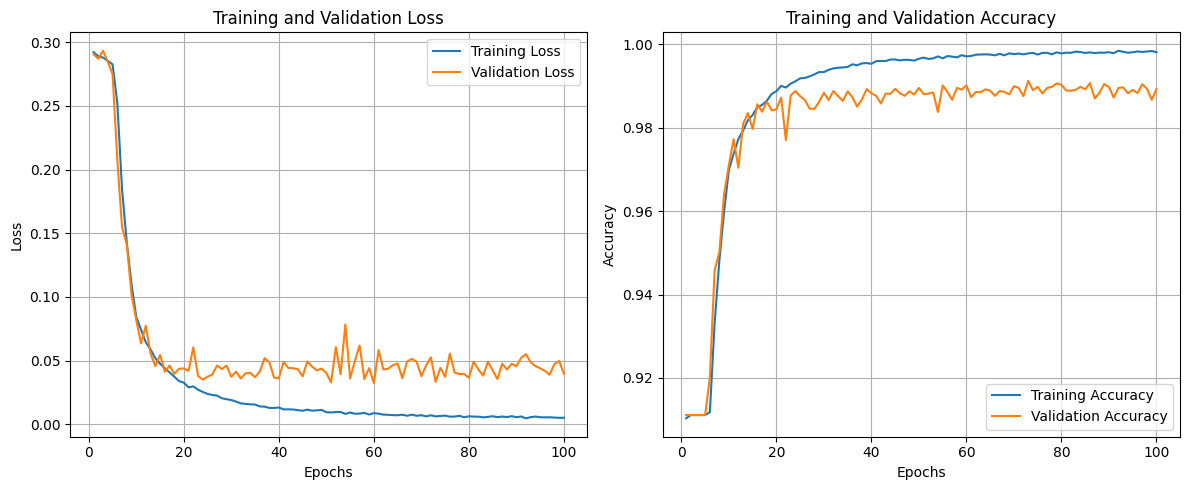

In [9]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


461/461 [==============================] - 2s 4ms/step
Test f1_score : 92.74%


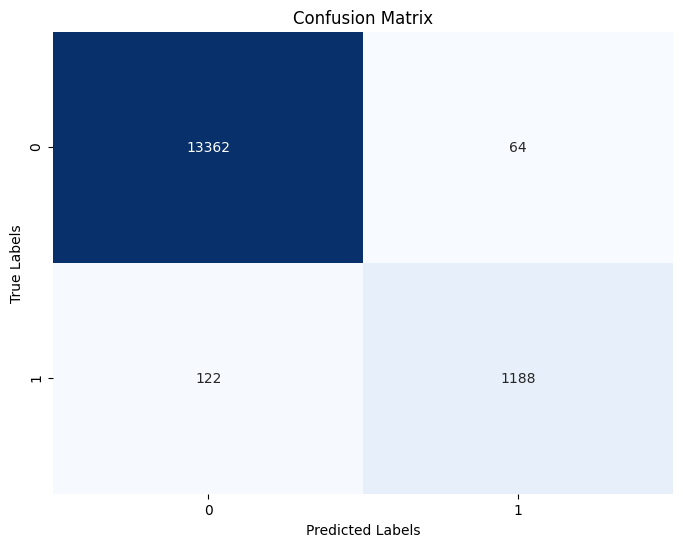

In [10]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the F1 score 

from sklearn.metrics import f1_score
f1=f1_score(np.argmax(np.array(y_test),axis=1), y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(np.argmax(np.array(y_test),axis=1), y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [11]:
y_pred_classes

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [12]:
y_test

,fake,real
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
14731,1,0
14732,1,0
14733,1,0
14734,1,0


# eraly stopping

In [13]:
import tensorflow as tf
# Reshape the data to match the LSTM input shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

# Initialize a Sequential model
model = Sequential()

# Add an LSTM layer
model.add(LSTM(128, input_shape=(X_train.shape[1], 1)))

# Add a fully connected layer
model.add(Dense(64, activation='relu'))

# Add the output layer with softmax activation
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val),callbacks=[callback])



Epoch 1/100
1843/1843 [==============================] - 19s 9ms/step - loss: 0.2924 - accuracy: 0.9111 - val_loss: 0.2894 - val_accuracy: 0.9111
Epoch 2/100
1843/1843 [==============================] - 17s 9ms/step - loss: 0.2893 - accuracy: 0.9111 - val_loss: 0.2892 - val_accuracy: 0.9111
Epoch 3/100
1843/1843 [==============================] - 17s 9ms/step - loss: 0.2884 - accuracy: 0.9111 - val_loss: 0.2872 - val_accuracy: 0.9111
Epoch 4/100
1843/1843 [==============================] - 17s 9ms/step - loss: 0.2860 - accuracy: 0.9111 - val_loss: 0.2821 - val_accuracy: 0.9111
Epoch 5/100
1843/1843 [==============================] - 17s 9ms/step - loss: 0.2706 - accuracy: 0.9111 - val_loss: 0.2933 - val_accuracy: 0.9111
Epoch 6/100
1843/1843 [==============================] - 17s 9ms/step - loss: 0.2585 - accuracy: 0.9129 - val_loss: 0.2080 - val_accuracy: 0.9184
Epoch 7/100
1843/1843 [==============================] - 17s 9ms/step - loss: 0.1545 - accuracy: 0.9429 - val_loss: 0.1333 -

In [14]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

461/461 - 2s - loss: 0.0298 - accuracy: 0.9921 - 2s/epoch - 5ms/step
Test Accuracy: 99.21%


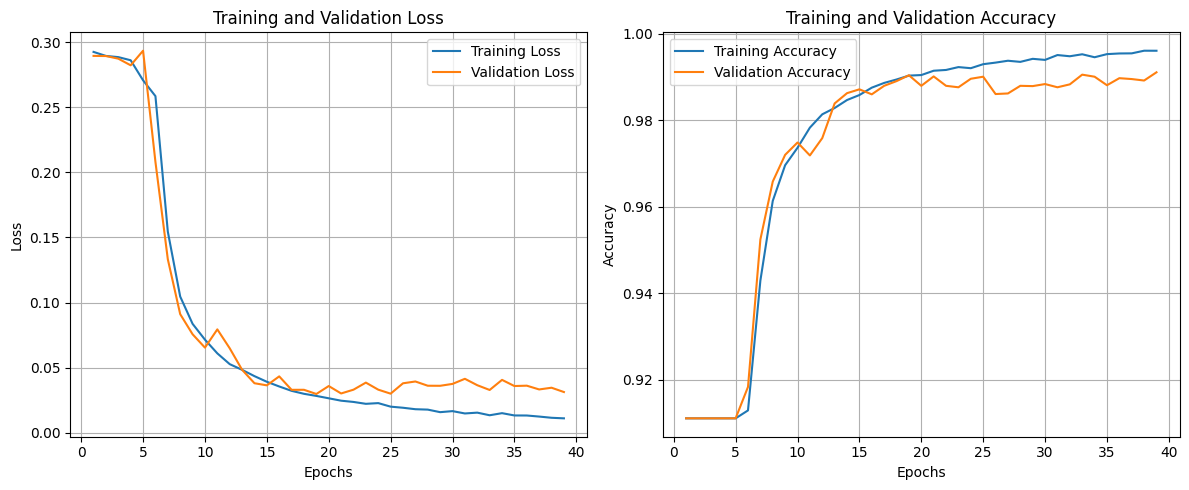

In [15]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()




461/461 [==============================] - 2s 4ms/step
Test f1_score : 95.55%


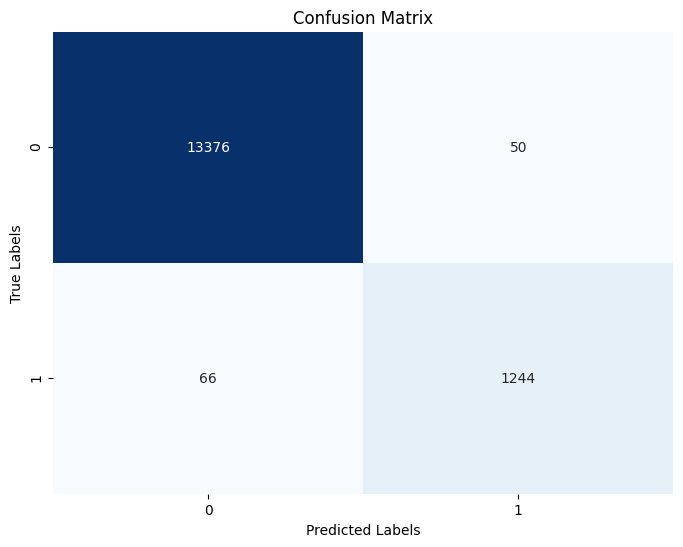

In [16]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the F1 score 

from sklearn.metrics import f1_score
f1=f1_score(np.argmax(np.array(y_test), axis=1), y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(np.argmax(np.array(y_test), axis=1), y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [11]:

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout, BatchNormalization, GlobalMaxPooling1D


# Define a more complex RNN model

model = Sequential()

model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(100,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(128)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/20
922/922 [==============================] - 40s 36ms/step - loss: 0.4338 - accuracy: 0.8549 - val_loss: 0.3225 - val_accuracy: 0.9111
Epoch 2/20
922/922 [==============================] - 31s 34ms/step - loss: 0.3148 - accuracy: 0.9110 - val_loss: 0.2930 - val_accuracy: 0.9111
Epoch 3/20
922/922 [==============================] - 31s 34ms/step - loss: 0.3030 - accuracy: 0.9111 - val_loss: 0.3208 - val_accuracy: 0.9111
Epoch 4/20
922/922 [==============================] - 31s 34ms/step - loss: 0.2897 - accuracy: 0.9108 - val_loss: 0.3195 - val_accuracy: 0.9032
Epoch 5/20
922/922 [==============================] - 31s 34ms/step - loss: 0.2750 - accuracy: 0.9107 - val_loss: 1.8718 - val_accuracy: 0.0889
Epoch 6/20
922/922 [==============================] - 31s 34ms/step - loss: 0.2755 - accuracy: 0.9111 - val_loss: 0.9747 - val_accuracy: 0.2973
Epoch 7/20
922/922 [==============================] - 31s 34ms/step - loss: 0.2545 - accuracy: 0.9127 - val_loss: 0.2276 - val_accuracy:

In [12]:
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/20
922/922 [==============================] - 32s 34ms/step - loss: 0.1480 - accuracy: 0.9456 - val_loss: 0.3872 - val_accuracy: 0.9199
Epoch 2/20
922/922 [==============================] - 31s 34ms/step - loss: 0.1439 - accuracy: 0.9476 - val_loss: 0.5885 - val_accuracy: 0.9116
Epoch 3/20
922/922 [==============================] - 31s 34ms/step - loss: 0.1395 - accuracy: 0.9489 - val_loss: 8.6103 - val_accuracy: 0.0916
Epoch 4/20
922/922 [==============================] - 31s 34ms/step - loss: 0.1390 - accuracy: 0.9491 - val_loss: 0.2958 - val_accuracy: 0.9217
Epoch 5/20
922/922 [==============================] - 31s 34ms/step - loss: 0.1328 - accuracy: 0.9511 - val_loss: 0.2163 - val_accuracy: 0.9275
Epoch 6/20
922/922 [==============================] - 31s 34ms/step - loss: 0.1300 - accuracy: 0.9522 - val_loss: 0.3572 - val_accuracy: 0.9203
Epoch 7/20
922/922 [==============================] - 31s 34ms/step - loss: 0.1250 - accuracy: 0.9541 - val_loss: 2.5490 - val_accuracy: